# Exploring the power outage dataset eaglei_outages_2016.csv (Time series data)

The `eaglei_outages_2016.csv` file is structured a little differently. Each Row represents 15 minute increments in the year 2016 for a county, and gives the number of customers who were out of power during that 15 minute period in the "sum" column. So in this datset, you get data that evolves over a period of time (in this case, over the year 2016). So as you can imagine, with the number of 15 minute increments in a year and the number of counties in the US, there are a lot of rows. This is called a 'time series' dataset.

Two things to note about the data in run_start_time and sum:
1. The time is given in UTC so it is not showing the timezone of the county in question.
2. Not all time intervals between data points are in intervals of 15 min. If there were no power outages happening in a county during a particular 15 min interval, those rows are left out of the data table. This helps minimize the size of the daa set. However, it may make it more difficult to compare counties with different time sample rates.


Lets create a dataframe with this dataset. Make sure the 'eaglei_outages_2016.csv' file is in the data folder.

In [1]:
import numpy as np
import scipy
from scipy import interpolate
import pandas as pd

In [2]:
eaglei_outages_df = pd.read_csv("data/eaglei_outages/eaglei_outages_2016.csv", delimiter=',', skiprows=0, low_memory=False)


In [3]:
eaglei_outages_df

,fips_code,county,state,sum,run_start_time
0,2122,Kenai Peninsula,Alaska,657,2016-01-01 00:00:00
1,5003,Ashley,Arkansas,7,2016-01-01 00:00:00
2,5029,Conway,Arkansas,2,2016-01-01 00:00:00
3,5069,Jefferson,Arkansas,41,2016-01-01 00:00:00
4,5081,Little River,Arkansas,61,2016-01-01 00:00:00
...,...,...,...,...,...
13306019,54061,Monongalia,West Virginia,472,2016-12-31 00:00:00
13306020,54069,Ohio,West Virginia,37,2016-12-31 00:00:00
13306021,54075,Pocahontas,West Virginia,200,2016-12-31 00:00:00
13306022,54099,Wayne,West Virginia,2,2016-12-31 00:00:00


You can see that there is a column called 'run_start_time' that marks a date and time. That will allow you to filter for specific days, or even specific date or time ranges. For example, if you want to filter the rows down to only those for 2016-01-20 and 2016-06-21, you can do so by doing something like

In [4]:
# we can combine two or more conditions in loc with the & symbol
# the & symbol between conditions indicates that both need to be satisfied for a given row
eaglei_outages_20_21_df = eaglei_outages_df.loc[(eaglei_outages_df['run_start_time'] >= "2016-06-20 00:00:00") 
                                                & (eaglei_outages_df['run_start_time'] < "2016-06-22 00:00:00")]
eaglei_outages_20_21_df

,fips_code,county,state,sum,run_start_time
5966141,4013,Maricopa,Arizona,754,2016-06-20 00:00:00
5966142,4019,Pima,Arizona,1027,2016-06-20 00:00:00
5966143,5003,Ashley,Arkansas,54,2016-06-20 00:00:00
5966144,5045,Faulkner,Arkansas,2,2016-06-20 00:00:00
5966145,5093,Mississippi,Arkansas,2,2016-06-20 00:00:00
...,...,...,...,...,...
6046879,55073,Marathon,Wisconsin,1,2016-06-21 23:45:00
6046880,55093,Pierce,Wisconsin,1,2016-06-21 23:45:00
6046881,55101,Racine,Wisconsin,2,2016-06-21 23:45:00
6046882,55133,Waukesha,Wisconsin,7,2016-06-21 23:45:00


Now from this say we want to compare the power outage numbers over those two days for certain counties (e.g. Los Angeles,CA and Pima,AZ) with a line chart, how do we do that? 

We could just make separate line charts. That's pretty easy.


<Axes: title={'center': 'Los Angeles Power outages'}, xlabel='run_start_time', ylabel='power outages'>

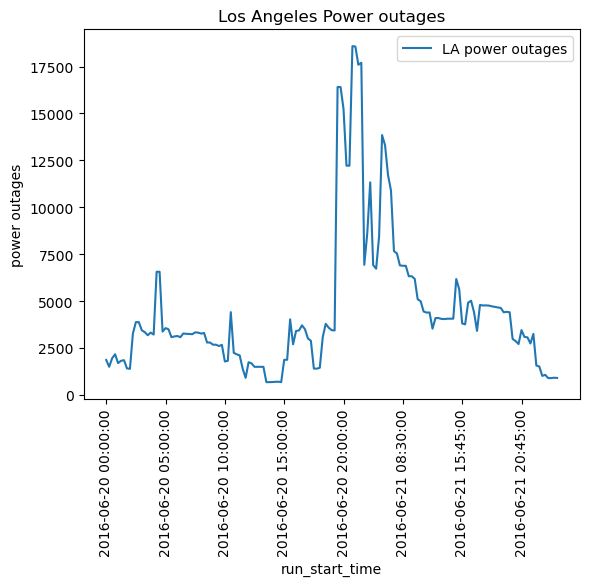

In [5]:
losangeles_df = eaglei_outages_20_21_df.loc[eaglei_outages_df['fips_code'] == 6037]
losangeles_df.plot(x="run_start_time", y="sum", rot=90, title="Los Angeles Power outages", ylabel="power outages", label="LA power outages")

<Axes: title={'center': 'Pima AZ Power outages'}, xlabel='run_start_time', ylabel='power outages'>

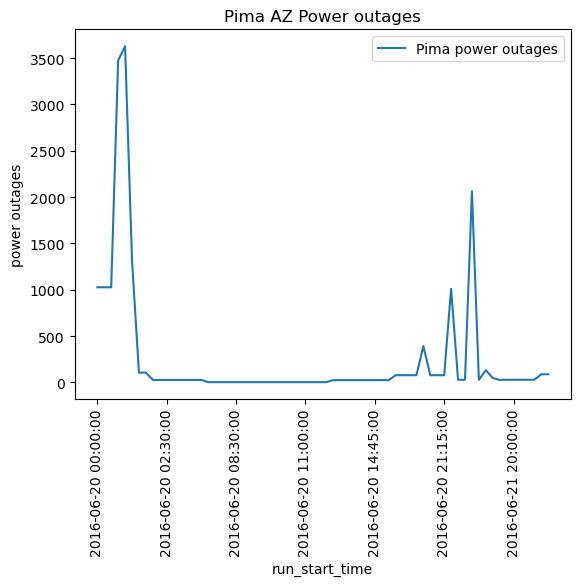

In [6]:
pima_df = eaglei_outages_20_21_df.loc[eaglei_outages_df['fips_code'] == 4019]
pima_df.plot(x="run_start_time", y="sum", rot=90, title="Pima AZ Power outages", ylabel="power outages", label="Pima power outages")

But it would be neat if they could be on the same chart. How do we do that? Maybe can do something like the below

Text(0.5, 1.0, 'Comparing LA and Pima')

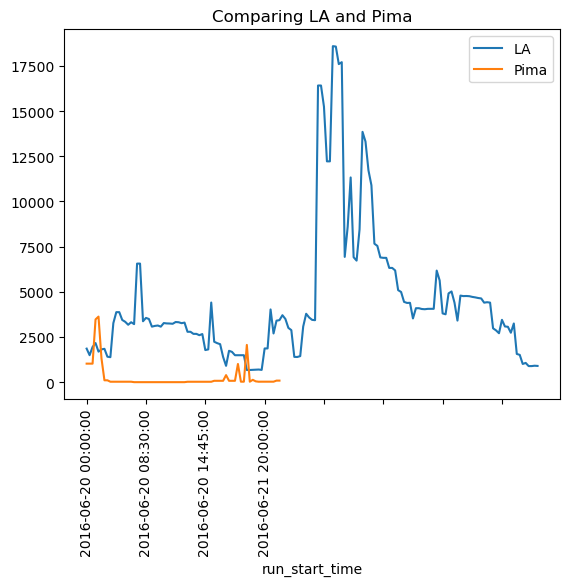

In [7]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
# specifying ax makes sure that the same figure is used for plotting both dataframes
# los angeles data
losangeles_df.plot(ax=ax,x="run_start_time", y="sum", rot=90, label="LA")
# Pima data
pima_df.plot(ax=ax,x="run_start_time", y="sum", rot=90, label="Pima")
plt.title("Comparing LA and Pima")



Well that looks a little weird, doesn't it? What happened? 

Lets investigate the size of the Los Angeles and Pima dataframes

In [8]:
print("rows, columns of the LA dataframe:", losangeles_df.shape)
print("rows, columns of the Pima dataframe:", pima_df.shape)

rows, columns of the LA dataframe: (153, 5)
rows, columns of the Pima dataframe: (66, 5)


In [9]:
losangeles_df


,fips_code,county,state,sum,run_start_time
5966152,6037,Los Angeles,California,1858,2016-06-20 00:00:00
5966613,6037,Los Angeles,California,1495,2016-06-20 00:15:00
5967049,6037,Los Angeles,California,1949,2016-06-20 00:30:00
5967489,6037,Los Angeles,California,2165,2016-06-20 00:45:00
5967939,6037,Los Angeles,California,1692,2016-06-20 01:00:00
...,...,...,...,...,...
6044061,6037,Los Angeles,California,1067,2016-06-21 22:45:00
6044634,6037,Los Angeles,California,892,2016-06-21 23:00:00
6045205,6037,Los Angeles,California,892,2016-06-21 23:15:00
6045775,6037,Los Angeles,California,912,2016-06-21 23:30:00


As you can see, the LA dataframe has a lot more rows than the Pima dataframe. This could indicate that the Pima dataframe does not have all the timestamps that the LA dataframe has i.e. there is more data collected for the LA dataframe. So we're running into the age old problem in data science: missing data. Always be wary of the fact that your data may not be as complete as you think! We can still do the comparison though, we just need to up sample the time series data for Pima and interpolate the power outage data to match the new sample rate. We will start by converting the date and time data into an integer so that it is easier to up sample. Here is an explanation  of linear interpolation: https://en.wikipedia.org/wiki/Linear_interpolation.

In [10]:
# use the to_datetime function and the apply function to covert the date and time into a single representative integer
pima_df['time'] = pima_df['run_start_time'].apply(lambda run_start_time : pd.to_datetime(run_start_time).value)

pima_df

/var/folders/yc/bhv4y9kn64d3vbj319tpd9qxsjf3cl/T/ipykernel_2754/1599026316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pima_df['time'] = pima_df['run_start_time'].apply(lambda run_start_time : pd.to_datetime(run_start_time).value)


,fips_code,county,state,sum,run_start_time,time
5966142,4019,Pima,Arizona,1027,2016-06-20 00:00:00,1466380800000000000
5966603,4019,Pima,Arizona,1027,2016-06-20 00:15:00,1466381700000000000
5967039,4019,Pima,Arizona,1027,2016-06-20 00:30:00,1466382600000000000
5967478,4019,Pima,Arizona,3474,2016-06-20 00:45:00,1466383500000000000
5967928,4019,Pima,Arizona,3629,2016-06-20 01:00:00,1466384400000000000
...,...,...,...,...,...,...
6038024,4019,Pima,Arizona,29,2016-06-21 20:15:00,1466540100000000000
6038644,4019,Pima,Arizona,29,2016-06-21 20:30:00,1466541000000000000
6039252,4019,Pima,Arizona,29,2016-06-21 20:45:00,1466541900000000000
6045194,4019,Pima,Arizona,88,2016-06-21 23:15:00,1466550900000000000


In [11]:
pd.to_datetime(1466380800000000000)

Timestamp('2016-06-20 00:00:00')

In [12]:
losangeles_df['time'] = losangeles_df['run_start_time'].apply(lambda run_start_time : pd.to_datetime(run_start_time).value)

losangeles_df

/var/folders/yc/bhv4y9kn64d3vbj319tpd9qxsjf3cl/T/ipykernel_2754/3920857566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losangeles_df['time'] = losangeles_df['run_start_time'].apply(lambda run_start_time : pd.to_datetime(run_start_time).value)


,fips_code,county,state,sum,run_start_time,time
5966152,6037,Los Angeles,California,1858,2016-06-20 00:00:00,1466380800000000000
5966613,6037,Los Angeles,California,1495,2016-06-20 00:15:00,1466381700000000000
5967049,6037,Los Angeles,California,1949,2016-06-20 00:30:00,1466382600000000000
5967489,6037,Los Angeles,California,2165,2016-06-20 00:45:00,1466383500000000000
5967939,6037,Los Angeles,California,1692,2016-06-20 01:00:00,1466384400000000000
...,...,...,...,...,...,...
6044061,6037,Los Angeles,California,1067,2016-06-21 22:45:00,1466549100000000000
6044634,6037,Los Angeles,California,892,2016-06-21 23:00:00,1466550000000000000
6045205,6037,Los Angeles,California,892,2016-06-21 23:15:00,1466550900000000000
6045775,6037,Los Angeles,California,912,2016-06-21 23:30:00,1466551800000000000


### How to Up Sample Data with numpy

To make a comparison, both the Los Angeles and Pima county data sets need to be up-sampled so that they have the same time frequency. We'll create a time array called `new_t`, that has the right time frequency and then interpolate between all the data points in the data series to follow this new greater time frequency. 

We will use numpy arrays to do the interpolation because numpy has an interpolate function that will make this quite easy. It may be possible to do it entirely in pandas data frames, though. Perhaps you can google it and find out!



In [13]:
# Step 1.: Convert all the pandas dataframes for time and sum of outages to numpy arrays. 
# time_la_array is the timestamp array for Los Angeles County
# sum_la_array is the sum of customers without power for that timestamp for Los Angeles County
# time_pima_array is the timestamp array for Pima County
# sum_pima_array is the sum of customers without power for that timestamp for Pima County

import numpy as np
time_la_array = losangeles_df['time'].to_numpy()
sum_la_array = losangeles_df['sum'].to_numpy()
time_pima_array = pima_df['time'].to_numpy()
sum_pima_array = pima_df['sum'].to_numpy()


In [14]:
# Step 2: make a group of functions that follow the changes in time and number of outages between each data point in each series. 
# For example, if the time interval between the first and second data points in the Pima county data series is 30 minutes rather
# than 15 min, like it is in the LA County series, these functions below
# help us follow that so we will be able to up sample the Pima series for 15 minute intervals.


f_la_time_interpolate = interpolate.interp1d(time_la_array, time_la_array)
f_la_time_sum_interpolate = interpolate.interp1d(time_la_array, sum_la_array)
f_pima_time_interpolate = interpolate.interp1d(time_pima_array, time_pima_array)
f_pima_time_sum_interpolate = interpolate.interp1d(time_pima_array, sum_pima_array)


Step 3: Make a time series array to use to up sample all the data to the time frequency we want. 

We will use the numpy  np.arange function to do this. It takes three arguments: start time, end time and increment. In the cells below we find those values using the los angeles data because it has the highest sample rate. 



In [15]:
# Step 3a: Find the time increment

# We want a time frequency that captures the best available detail in the data. 

# If you go up and look at the run_start_time data for LA country, you will notice that most data points are 15 minutes apart. 
# a 15 minute increment corresponds to 900000000000 in our timestamp. 

# Find the time increment in the LA data by subtracting the first time from the second timestamp data.
test = 1466382600000000000 - 1466381700000000000
test


900000000000

In [16]:
# Step 3b: Find how large our sampling array 
# find the last value in the array 
print(losangeles_df.iloc[-1])

fips_code                        6037
county                    Los Angeles
state                      California
sum                               901
run_start_time    2016-06-21 23:45:00
time              1466552700000000000
Name: 6046333, dtype: object


In [17]:
# Step 3c: Make an array that has a timestamp for every 15 minutes for the full range of the time data in the day.  
# we cut and past the start time from the first point in the Los Angeles data series. 
# we use the end time and increment that we found in the cells above.

new_t=np.arange(1466380800000000000, 1466552700000000000, 900000000000)
len(new_t)

191

In [18]:
# Step 4: use the functions you found in step 2 above and the new_t array from Step 3, t
# o up sample all of the time and sum ( of customers without power) data 
# to the new time frequency of 15 minutes.  

# xnewp = Pima timestamp upsampled to 15 min intervals
# xnewpt = Upsample Pima timestamp data converted back to human readable Month/Day/Hour 
# ynewp Pima "sum" data up sampled to the new 15 min time intervals 
# xnewla = Los Angeles timestamp upsampled to 15 min intervals
# ynewla = Los Angeles "sum" upsampled to 15 min intervals
xnewp = f_pima_time_interpolate(new_t)
xnewpt = pd.to_datetime(new_t)
ynewp = f_pima_time_sum_interpolate(new_t)
xnewla = f_la_time_interpolate(new_t)
ynewla = f_la_time_sum_interpolate(new_t)


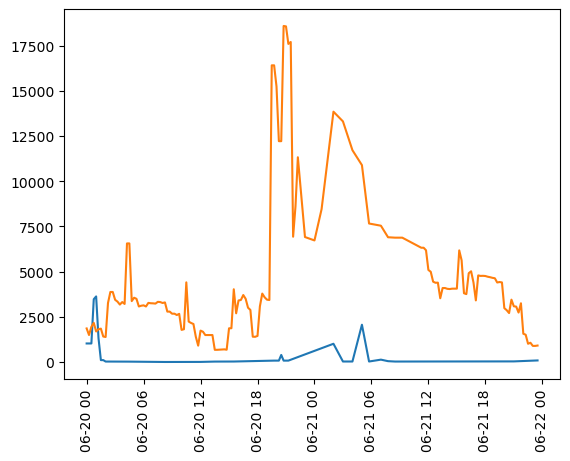

In [19]:
# Plot the data 

plt.xticks(rotation=90);
plt.plot(xnewpt, ynewp, '-')
plt.plot(xnewpt, ynewla, '-')


Interesting! Though Los Angeles county has a much larger total number of customers without power at it maxiums than Pima county, the 2nd Pima county maximum looks like its happening at roughly the same time as the Los Angeles county 2nd maximun. 

The two counties are in the same time zone. It is helpful to note that the eagle-I data time is set in UTC. What time is it in LA at 6:00 am UTC? Do you suppose the weather could be causing the outage maxumums? Is 6:00 am UTC a time when lots of people would be home cooking and runnning their air conditioning in LA or in Pima?
 
 
 Perhaps evenyone is getting up for work at 6 AM turning on thier stoves, air conditioners and hair dryers and overwhelmeing the power grid? Do you suppose that other near-by counties show maxumum of customeres without power in the 6 am o'clock hour. 


### Exercise
1. 
Pick another nearby county ora  few, up sample and interpolate their data then plotthemt with Pima and Los Angeles (San Bernadino would be interesting).

2. Do thier outage maximums happen near the same time?
3. 1. What do you suppose accounts for the very different number of customers without power for each county? Can you visualize anything like population or poverty to show those compare for your selected counies? are


## 6. Aggregating time series data to get mean and median

Now that we've learned how to work with and visualize time series, it would also be useful to know how to _aggregate_ data across a time series. Say you want to find the average of power outages across the whole day for Los Angeles county for June 20. But we know that the data is in 15 minute chunks, and that the `run_start_time` column is in UTC so has to be adjusted to get June 20 local time. 

Again, Pandas comes to the rescue. Lets make use of the eaglei_outages_df we created earlier


In [20]:
eaglei_outages_df

,fips_code,county,state,sum,run_start_time
0,2122,Kenai Peninsula,Alaska,657,2016-01-01 00:00:00
1,5003,Ashley,Arkansas,7,2016-01-01 00:00:00
2,5029,Conway,Arkansas,2,2016-01-01 00:00:00
3,5069,Jefferson,Arkansas,41,2016-01-01 00:00:00
4,5081,Little River,Arkansas,61,2016-01-01 00:00:00
...,...,...,...,...,...
13306019,54061,Monongalia,West Virginia,472,2016-12-31 00:00:00
13306020,54069,Ohio,West Virginia,37,2016-12-31 00:00:00
13306021,54075,Pocahontas,West Virginia,200,2016-12-31 00:00:00
13306022,54099,Wayne,West Virginia,2,2016-12-31 00:00:00


In [21]:
# to get only Los Angeles, lets select by the FIPS code and also make sure that run_start_time is
# within 2016-06-20 00:00:00 and 2016-06-21 00:00:00 Pacific standard time (or in the case of June
# Pacific Daylight time, which is 7 hours behind UTC)
la_outages_0620_df = eaglei_outages_df.loc[(eaglei_outages_df["fips_code"]==6037) 
                                          & (eaglei_outages_df["run_start_time"]>="2016-06-19 17:00:00")
                                          & (eaglei_outages_df["run_start_time"]<="2016-06-20 17:00:00")]
la_outages_0620_df

,fips_code,county,state,sum,run_start_time
5953439,6037,Los Angeles,California,167,2016-06-19 17:00:00
5953892,6037,Los Angeles,California,144,2016-06-19 17:15:00
5954341,6037,Los Angeles,California,152,2016-06-19 17:30:00
5954792,6037,Los Angeles,California,153,2016-06-19 17:45:00
5955241,6037,Los Angeles,California,162,2016-06-19 18:00:00
...,...,...,...,...,...
5993451,6037,Los Angeles,California,3404,2016-06-20 16:00:00
5994131,6037,Los Angeles,California,3433,2016-06-20 16:15:00
5994808,6037,Los Angeles,California,3706,2016-06-20 16:30:00
5995490,6037,Los Angeles,California,3498,2016-06-20 16:45:00


We then need to use the `groupby` method to group the la_outages_0620_df by the fips code. This is necessary since pandas needs to group the data first before it can do any aggregation operations.



In [22]:
la_outages_grouped=la_outages_0620_df.groupby("fips_code")
la_outages_grouped

In [24]:
la_outages_grouped.groups

{6037: [5953439, 5953892, 5954341, 5954792, 5955241, 5955683, 5956121, 5956555, 5956995, 5957453, 5957903, 5958335, 5958786, 5959246, 5959708, 5960164, 5960624, 5961077, 5961504, 5961957, 5962409, 5962855, 5963313, 5963782, 5964254, 5964726, 5965208, 5965687, 5966152, 5966613, 5967049, 5967489, 5967939, 5968387, 5968848, 5969303, 5969752, 5970203, 5970642, 5971078, 5971519, 5971939, 5972345, 5972735, 5973112, 5973475, 5973834, 5974186, 5974531, 5974865, 5975199, 5975522, 5975844, 5976164, 5976488, 5976800, 5977106, 5977412, 5977712, 5978009, 5978310, 5978609, 5978901, 5979199, 5979495, 5979783, 5980068, 5980354, 5980639, 5980917, 5981197, 5981487, 5981793, 5982130, 5982491, 5982888, 5983312, 5983784, 5984286, 5984818, 5985371, 5985957, 5986563, 5987199, 5987863, 5988528, 5989227, 5989932, 5990645, 5991351, 5992057, 5992754, 5993451, 5994131, 5994808, 5995490, 5996170]}

In [23]:
# now we can aggregate the data in each group (i.e. in each county) to get the mean and median of the  (and 
# others too if you want) 

la_outages_agg = la_outages_grouped[["county", "state", "sum"]].agg({"county":"first", "state":"first", "sum":["mean", "median"] })
la_outages_agg

county       state          sum        
                 first       first         mean  median
fips_code                                              
6037       Los Angeles  California  2037.154639  1815.0

Now `groupby` and `agg` isn't as useful if all you want is the aggregate data for one 'group' (i this case, the group is all data with fips_code==6037) since you could just find the average of the 'sum' column with other python functions after you filter down to LA county data. However, if you have multiple 'groups', like for example all the counties in CA, AZ, and NV (the southwest US states we're focusing on), Pandas will do the work of aggregating indvidual groups (i.e. counties) and you don't need to filter them out to aggregate them one by one.

In [25]:
# Note: For the most part, CA, AZ, and NV operate in UTC-7 (MST or PDT). Individual counties you may look at might
# differ so make sure to adjust time range if you feel it necessary
swus_outages_0620_df = eaglei_outages_df.loc[eaglei_outages_df["state"].isin(["California", "Nevada", "Arizona"]) 
                                          & (eaglei_outages_df["run_start_time"]>="2016-06-19 17:00:00")
                                          & (eaglei_outages_df["run_start_time"]<="2016-06-20 17:00:00")]
swus_outages_0620_df

,fips_code,county,state,sum,run_start_time
5953431,4013,Maricopa,Arizona,486,2016-06-19 17:00:00
5953439,6037,Los Angeles,California,167,2016-06-19 17:00:00
5953440,6065,Riverside,California,42,2016-06-19 17:00:00
5953441,6071,San Bernardino,California,379,2016-06-19 17:00:00
5953442,6083,Santa Barbara,California,19,2016-06-19 17:00:00
...,...,...,...,...,...
5996177,6111,Ventura,California,545,2016-06-20 17:00:00
5996516,32001,Churchill,Nevada,1,2016-06-20 17:00:00
5996517,32003,Clark,Nevada,16,2016-06-20 17:00:00
5996518,32009,Esmeralda,Nevada,1,2016-06-20 17:00:00


In [26]:
# Now grouping and aggregating them

swus_outages_grouped = swus_outages_0620_df.groupby("fips_code")
swus_outages_agg = swus_outages_grouped[["county", "state", "sum"]].agg({"county":"first", "state":"first", "sum":["mean", "median"] })
swus_outages_agg

county       state          sum        
                    first       first         mean  median
fips_code                                                 
4013             Maricopa     Arizona   298.315789   103.0
4019                 Pima     Arizona   275.022222    25.0
4021                Pinal     Arizona    12.750000    14.0
6029                 Kern  California    13.500000    16.0
6037          Los Angeles  California  2037.154639  1815.0
6059               Orange  California  2445.780488  2462.5
6065            Riverside  California   904.525773   497.0
6071       San Bernardino  California   606.329897   626.0
6073            San Diego  California   295.535714   228.5
6083        Santa Barbara  California    21.092784    19.0
6107               Tulare  California   126.500000   138.0
6111              Ventura  California   301.195876   231.0
32001           Churchill      Nevada     1.000000     1.0
32003               Clark      Nevada   416.373494    83.0
32007                Elko      Nevada     1.000000     1.0
32009           Esmeralda      Nevada     1.000000     1.0
32013            Humboldt      Nevada     3.555556     3.0
32015              Lander      Nevada    97.666667   111.0
32019                Lyon      Nevada     2.818182     3.0
32029              Storey      Nevada     1.000000     1.0
32031              Washoe      Nevada    44.389610     2.0
32510         Carson City      Nevada     1.000000     1.0

Remember that some of these counties might have missing data because not every 15 minute increment was recorded or there were no power outages during a particular time period. Mean calculated for Carson City, NV is not the same as the mean calculated for Los Angeles, CA. Another thing to remember is their customer sizes are also different.

In order to get a baseline of power outage for a particular county, you could measure a given county's average power outage against the total number of power customers in that county, or you could measure against the average number of power outages in that county at a time not during the heatwave period (maybe early June?)

Another thing we notice is that the fips_code becomes the Index instead of its own column because that's what we applied the groupby operation on. So you can get a row by simply doing `swus_outages_agg.loc[4013]` or some other FIPS code value (whereas before if we wanted to search by fips code we would have to do something like `swus_outages_agg.loc[swus_outages_agg["fips_code"]==4013`

In [27]:
swus_outages_agg.loc[4013]

county  first       Maricopa
state   first        Arizona
sum     mean      298.315789
        median         103.0
Name: 4013, dtype: object

More documentation on groupby and agg here: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


### Exercises
1. Can you identify which counties had the highest average power outages on a given day? What range of days are you looking at?
2. Of the counties identified, can you find out how the power outages varied through out the day? When was the power out the most? Can you draw a line chart to show that?


## 7. Merging aggregated data with a regular dataframe

One thing to note is that the dataframe you get after you do aggregation is a little different from a regular dataframe. You'll notice that some columns have two levels of names - 'county' and 'first' , 'sum' and 'mean' etc. Something you'll need to know is how to merge an aggregated dataframe with multilevel column names with regular dataframes (that have single column names). Pandas treats them differently so its useful for us to know how to change the multilevel name into a single level name to make it easy to merge your dataframes.




In [28]:
# multilevel column names
swus_outages_agg.columns

MultiIndex([('county',  'first'),
            ( 'state',  'first'),
            (   'sum',   'mean'),
            (   'sum', 'median')],
           )

In [29]:
# select only the mean and median columns 
swus_outages_agg_sum = swus_outages_agg[[('sum', 'mean'), ('sum', 'median')]]
swus_outages_agg_sum

sum        
                  mean  median
fips_code                     
4013        298.315789   103.0
4019        275.022222    25.0
4021         12.750000    14.0
6029         13.500000    16.0
6037       2037.154639  1815.0
6059       2445.780488  2462.5
6065        904.525773   497.0
6071        606.329897   626.0
6073        295.535714   228.5
6083         21.092784    19.0
6107        126.500000   138.0
6111        301.195876   231.0
32001         1.000000     1.0
32003       416.373494    83.0
32007         1.000000     1.0
32009         1.000000     1.0
32013         3.555556     3.0
32015        97.666667   111.0
32019         2.818182     3.0
32029         1.000000     1.0
32031        44.389610     2.0
32510         1.000000     1.0

In [30]:
# assign the level 1 name to the columns
swus_outages_agg_sum.columns = swus_outages_agg_sum.columns.get_level_values(1) # mean and median
swus_outages_agg_sum

,mean,median
fips_code,,
4013,298.315789,103.0
4019,275.022222,25.0
4021,12.750000,14.0
6029,13.500000,16.0
6037,2037.154639,1815.0
6059,2445.780488,2462.5
6065,904.525773,497.0
6071,606.329897,626.0
6073,295.535714,228.5


Since fips_code is the index, we can no longe get 'fips_code' as a column name (which we'll need when we merge). So lets reset the index to remove fips_code as the index

In [31]:
swus_outages_agg_sum = swus_outages_agg_sum.reset_index()
swus_outages_agg_sum

,fips_code,mean,median
0,4013,298.315789,103.0
1,4019,275.022222,25.0
2,4021,12.750000,14.0
3,6029,13.500000,16.0
4,6037,2037.154639,1815.0
5,6059,2445.780488,2462.5
6,6065,904.525773,497.0
7,6071,606.329897,626.0
8,6073,295.535714,228.5
9,6083,21.092784,19.0


Now lets try merging with a dataframe created from 2016_HHSemPOWERMapHistoricalDataset.xlsx

In [32]:
medically_vulnerable_df = pd.read_excel("data/2016_HHSemPOWERMapHistoricalDataset.xlsx", sheet_name="County") 

In [33]:
medically_vulnerable_df

,FIPS_Code,County_FIPS_Code,County,State_FIPS_Code,State,Jan_2016_Medicare_Benes,Jan_2016_Power_Dependent_Devices_DME,Feb_2016_Medicare_Benes,Feb_2016_Power_Dependent_Devices_DME,Mar_2016_Medicare_Benes,...,Aug_2016_Medicare_Benes,Aug_2016_Power_Dependent_Devices_DME,Sep_2016_Medicare_Benes,Sep_2016_Power_Dependent_Devices_DME,Oct_2016_Medicare_Benes,Oct_2016_Power_Dependent_Devices_DME,Nov_2016_Medicare_Benes,Nov_2016_Power_Dependent_Devices_DME,Dec_2016_Medicare_Benes,Dec_2016_Power_Dependent_Devices_DME
0,1001,1,Autauga,1,AL,9025,546,9043,546,9045,...,9142,529,9206,546,9236,577,9257,589,9275,595
1,1003,3,Baldwin,1,AL,42231,2025,42434,2037,42599,...,43236,2034,43434,2041,43669,2117,43855,2133,44002,2129
2,1005,5,Barbour,1,AL,5266,242,5267,238,5281,...,5310,251,5342,254,5348,260,5352,264,5345,254
3,1007,7,Bibb,1,AL,4616,211,4623,211,4623,...,4621,194,4635,190,4620,209,4624,218,4620,222
4,1009,9,Blount,1,AL,8631,594,8631,589,8655,...,8670,567,8708,575,8710,585,8733,591,8712,594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,72151,151,Yabucoa,72,PR,7560,274,7582,274,7592,...,7612,272,7643,271,7653,276,7650,267,7648,257
3224,72153,153,Yauco,72,PR,7094,263,7117,245,7118,...,7184,243,7218,229,7244,232,7251,236,7251,232
3225,78010,10,Saint Croix,78,VI,8538,72,8558,69,8558,...,8611,53,8663,56,8674,55,8681,53,8667,52
3226,78020,20,Saint John,78,VI,740,11,745,11,748,...,757,0,760,0,765,11,765,11,762,11


In [35]:
merged_df = medically_vulnerable_df.merge(swus_outages_agg_sum, how="inner", left_on="FIPS_Code", right_on="fips_code")
merged_df

,FIPS_Code,County_FIPS_Code,County,State_FIPS_Code,State,Jan_2016_Medicare_Benes,Jan_2016_Power_Dependent_Devices_DME,Feb_2016_Medicare_Benes,Feb_2016_Power_Dependent_Devices_DME,Mar_2016_Medicare_Benes,...,Sep_2016_Power_Dependent_Devices_DME,Oct_2016_Medicare_Benes,Oct_2016_Power_Dependent_Devices_DME,Nov_2016_Medicare_Benes,Nov_2016_Power_Dependent_Devices_DME,Dec_2016_Medicare_Benes,Dec_2016_Power_Dependent_Devices_DME,fips_code,mean,median
0,4013,13,Maricopa,4,AZ,556248,22569,558188,22847,561098,...,23157,571968,23529,573692,23394,575231,23317,4013,298.315789,103.0
1,4019,19,Pima,4,AZ,183276,8477,183945,8497,184858,...,8382,188352,8505,189062,8391,189717,8320,4019,275.022222,25.0
2,4021,21,Pinal,4,AZ,56548,2483,56787,2478,57378,...,2503,59043,2532,59271,2513,59656,2486,4021,12.750000,14.0
3,6029,29,Kern,6,CA,97412,5543,97577,5522,97774,...,5351,99378,5717,99577,5702,99748,5634,6029,13.500000,16.0
4,6037,37,Los Angeles,6,CA,1212814,34136,1215211,34540,1216939,...,34391,1238856,34674,1241323,34832,1243454,34729,6037,2037.154639,1815.0
5,6059,59,Orange,6,CA,415569,10298,416539,10306,417567,...,10238,425425,10502,426515,10396,427267,10334,6059,2445.780488,2462.5
6,6065,65,Riverside,6,CA,301262,11730,302145,11854,303142,...,12126,309414,12374,310348,12316,311152,12313,6065,904.525773,497.0
7,6071,71,San Bernardino,6,CA,236325,10595,236892,10681,237457,...,10903,242716,11128,243329,11058,243878,11012,6071,606.329897,626.0
8,6073,73,San Diego,6,CA,420191,11849,421175,12007,422260,...,12291,430332,12508,431469,12412,432295,12374,6073,295.535714,228.5
9,6083,83,Santa Barbara,6,CA,64853,2084,64918,2085,65011,...,1971,66053,1996,66250,1967,66334,1948,6083,21.092784,19.0
